<a href="https://colab.research.google.com/github/BenzineMohammedAymen/Predict-Survival-in-Colorectal-Cancer/blob/main/predict_survival_in_colorectal_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/BenzineMohammedAymen/Predict-Survival-in-Colorectal-Cancer.git

Cloning into 'Predict-Survival-in-Colorectal-Cancer'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 1.94 MiB | 7.94 MiB/s, done.


## **MedMNIST v2 - A large-scale lightweight benchmark for 2D and 3D biomedical image classifcation**

# **PathMNIST**

The PathMNIST is based on a prior study for **predicting survival from colorectal cancer**  histology slides, providing a dataset (NCT-CRC-HE-100K) of **100,000** non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of **7,180** image patches from a different clinical center. The dataset is comprised of **9 types** of tissues, resulting in a **multi-class classification** task. We resize the source images of **3 × 224 × 224** into **3 × 28 × 28**, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.

**Number of Channels**: 3
An image with 3 channels typically means it is a color image represented in the RGB color space (Red, Green, and Blue). Each channel holds intensity values for one of the primary colors.
**Number of Classes**: 9.
The model has 9 distinct classes, representing different types of tissues or structures in the images.

---


**Class Names**
The class names provide a label mapping for the numerical class indices. Each number (0 through 8) corresponds to a specific category:

---


•	0: Adipose - Fat tissue.

---


•	1: Background - Areas in the image that do not contain relevant tissue (likely the space or void).

---


•	2: Debris - Unwanted or non-specific matter in the sample.

---


•	3: Lymphocytes - A type of white blood cell, part of the immune system.

---


•	4: Mucus - A viscous substance secreted by mucous membranes.

---


•	5: Smooth Muscle - Tissue found in internal organs like the colon.

---


•	6: Normal Colon Mucosa - The healthy lining of the colon.

---


•	7: Cancer-Associated Stroma - Supportive tissue associated with cancerous growths.

---


•	8: Colorectal Adenocarcinoma Epithelium - Cancerous cells from the lining of the colon or rectum.

---


•  0النسيج الدهني (Adipose) - الأنسجة الدهنية.

---


•  1الخلفية (Background) - المناطق في الصورة التي لا تحتوي على أنسجة ذات صلة (غالبًا الفراغ أو المساحات الفارغة).

---


•  2الحطام (Debris) - مواد غير مرغوبة أو غير محددة في العينة.

---


•  3الخلايا الليمفاوية (Lymphocytes) - نوع من خلايا الدم البيضاء، جزء من الجهاز المناعي.

---


•  4المخاط (Mucus) - مادة لزجة تُفرزها الأغشية المخاطية.

---


•  5العضلات الملساء (Smooth Muscle) - أنسجة موجودة في الأعضاء الداخلية مثل القولون.

---


•  6مخاطية القولون الطبيعية (Normal Colon Mucosa) - البطانة السليمة للقولون.

---


•  7اللحمة المرتبطة بالسرطان (Cancer-Associated Stroma) - الأنسجة الداعمة المرتبطة بالنمو السرطاني.

---


•  8ظهارة سرطان القولون والمستقيم (Colorectal Adenocarcinoma Epithelium) - الخلايا السرطانية المأخوذة من بطانة القولون أو المستقيم.

                                      

---



# For MedMNIST2D, we first implement **ResNets10** with a simple early-stopping strategy on validation set as baseline methods. The ResNet model contains 4 residual layers and each layer has several blocks, which is a stack of convolutional layers, batch normalization and ReLU activation. The input channel is always 3 since we convert gray-scale images into RGB images. To fairly compare with other methods, the input resolutions are 28 or 224 (**resized from 28**) for the **ResNet-18** and **ResNet-50**. For all model training, we use cross entropy-loss and set the batch size as **128**. We utilize an **Adam** optimizer40 with an initial learning rate of **0.001** and train the model for **100 epochs**, delaying the learning rate by **0.1** after **50** and **75** epochs.

## **Our Project:**

In [ ]:
pip install medmnist

In [ ]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [ ]:
data_flag = 'pathmnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 10
BATCH_SIZE = 64
lr = 0.01

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [ ]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


In [ ]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K

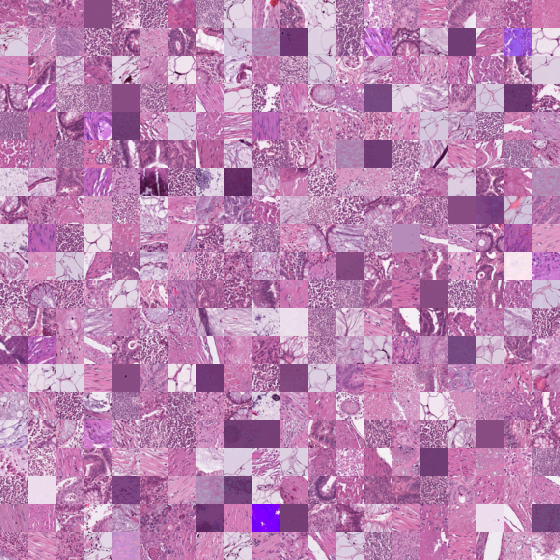

In [ ]:
train_dataset.montage(length=20)

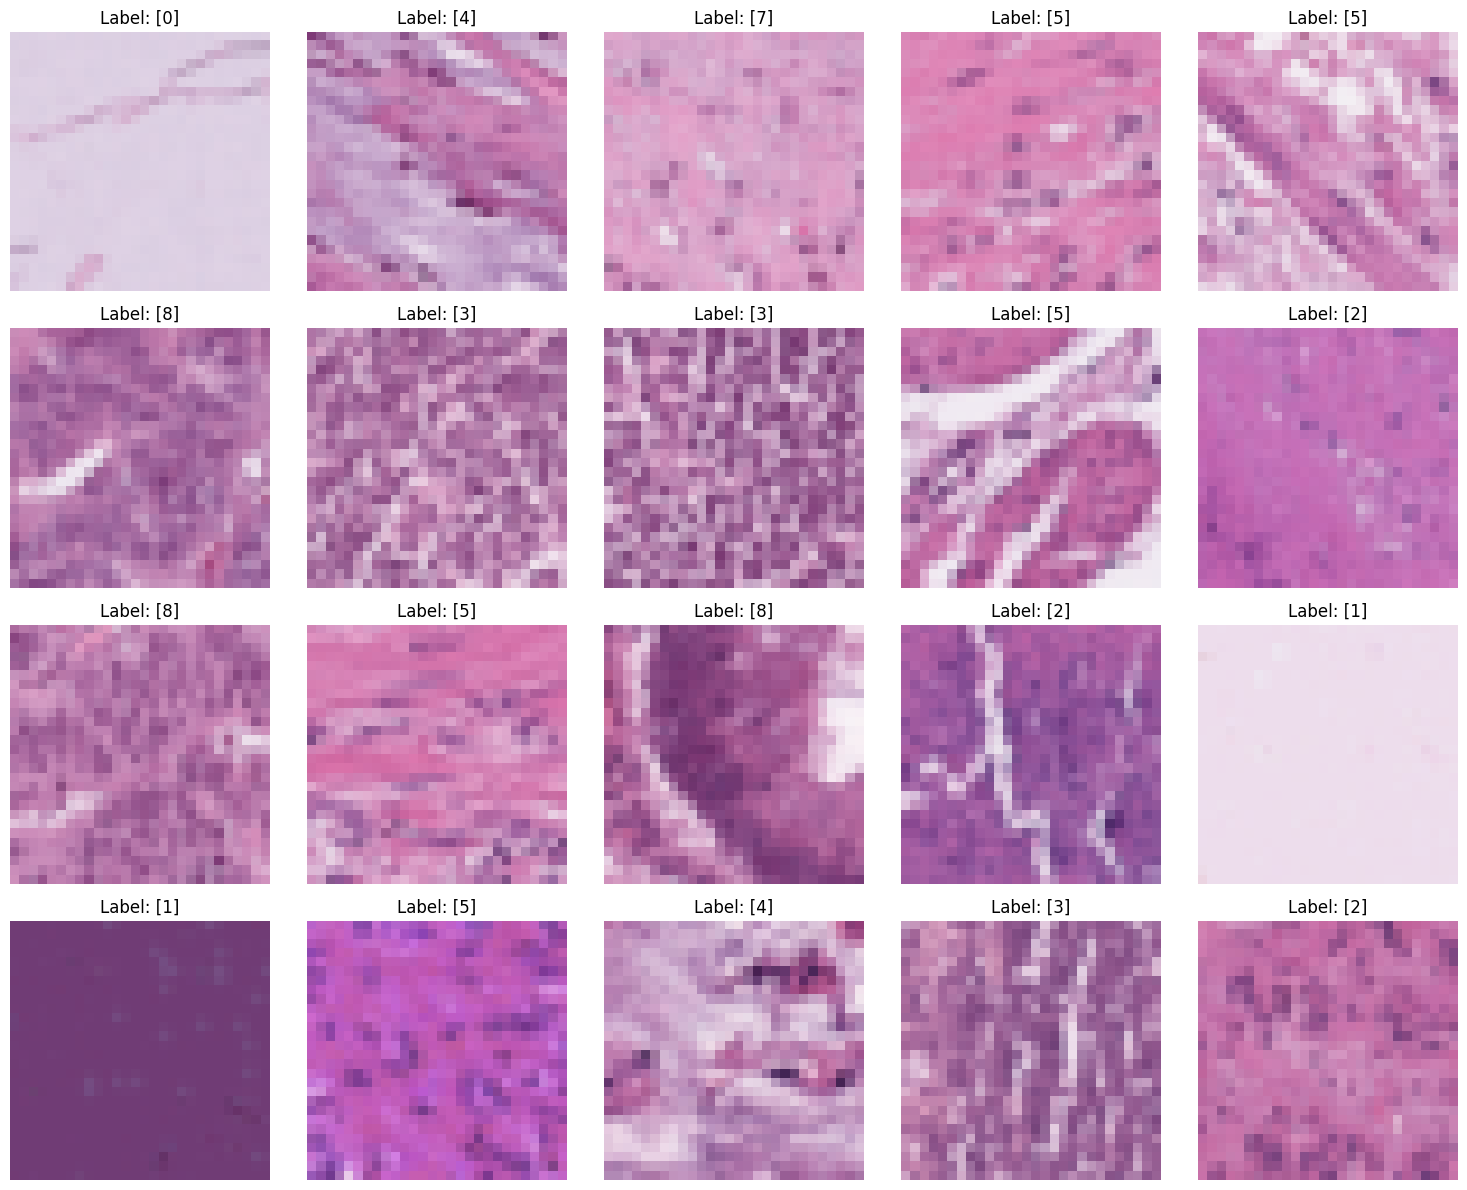

In [ ]:
import matplotlib.pyplot as plt

# Define the montage function
def show_montage(dataset, length=20, cols=5):
    """
    Displays a montage of images with their ground truths from the dataset.

    Args:
        dataset: The dataset object containing images and labels.
        length: The number of images to display.
        cols: Number of columns in the montage grid.
    """
    rows = (length + cols - 1) // cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()  # Flatten to handle cases where rows * cols > length

    for i in range(length):
        img, label = dataset[i]  # Get image and ground truth
        if hasattr(img, 'numpy'):  # Convert tensor to numpy if needed
            img = img.numpy().transpose(1, 2, 0)  # Convert to HWC
            img = (img * 0.5 + 0.5).clip(0, 1)  # Denormalize and clip

        # Plot image
        ax = axes[i]
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis('off')

    # Hide any extra subplots
    for ax in axes[length:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the montage function
show_montage(train_dataset, length=20, cols=5)


#**Let's improve the task using MobileNet V3**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import mobilenet_v3_small, mobilenet_v3_large

# Define MobileNetV3 model
class MobileNetV3Model(nn.Module):
    def __init__(self, in_channels, num_classes, use_large=True):
        super(MobileNetV3Model, self).__init__()
        if use_large:
            self.backbone = mobilenet_v3_large(weights=None)  # Large variant
        else:
            self.backbone = mobilenet_v3_small(weights=None)  # Small variant

        # Modify the input layer to match in_channels
        if in_channels != 3:  # Default MobileNetV3 expects 3 input channels
            self.backbone.features[0][0] = nn.Conv2d(
                in_channels, 16, kernel_size=3, stride=2, padding=1, bias=False
            )

        # Replace the classifier with a new one for the desired num_classes
        in_features = self.backbone.classifier[0].in_features
        self.backbone.classifier = nn.Sequential(
            nn.Linear(in_features, 128),  # Add intermediate layer if needed
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# Instantiate the model
model = MobileNetV3Model(in_channels=n_channels, num_classes=n_c lasses, use_large=True)

# Define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# Example: Print the model architecture
print(model)


MobileNetV3Model(
  (backbone): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormAct

#**Hyperparamater:**


*   **Number of epochs =** 3
*   **Learning Rate** = 0.001
*   **Batch Size** = 128
*   **Optimizer** = SGD




In [ ]:
from tqdm import tqdm
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to device
model = model.to(device)

# Training Loop
for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    # Set the model to training mode
    model.train()
    running_loss = 0.0

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}", unit="batch"):
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the GPU/CPU
        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Predicted class index
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    # Calculate and log training metrics
    train_accuracy = 100 * train_correct / train_total
    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_loader):.4f}, Accuracy = {train_accuracy:.2f}%")

    # Optional: Validation/Evaluation Loop
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            test_total += targets.size(0)
            test_correct += (predicted == targets).sum().item()

    test_accuracy = 100 * test_correct / test_total
    print(f"Validation Accuracy = {test_accuracy:.2f}%")


Using device: cpu


Epoch 1/3: 100%|██████████| 704/704 [14:21<00:00,  1.22s/batch]


Epoch 1: Loss = 1.2724, Accuracy = 53.99%
Validation Accuracy = 2678.25%


Epoch 2/3: 100%|██████████| 704/704 [14:09<00:00,  1.21s/batch]


Epoch 2: Loss = 0.6994, Accuracy = 74.37%
Validation Accuracy = 3110.45%


Epoch 3/3: 100%|██████████| 704/704 [13:58<00:00,  1.19s/batch]


Epoch 3: Loss = 0.5714, Accuracy = 79.00%
Validation Accuracy = 2788.41%


#**Hyperparamater:**


*   **Number of epochs =** 5
*   **Learning Rate** = 0.001
*   **Batch Size** = 128
*   **Optimizer** = SGD




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

# Define ResNet18 model
class ResNet18Model(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(ResNet18Model, self).__init__()
        # Load the pre-trained ResNet18 model (without pretrained weights)
        self.backbone = resnet18(weights=None)

        # Modify the input layer to match in_channels
        if in_channels != 3:  # Default ResNet18 expects 3 input channels
            self.backbone.conv1 = nn.Conv2d(
                in_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
            )

        # Replace the classifier with a new one for the desired num_classes
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

# Instantiate the model
model_redNet = ResNet18Model(in_channels=n_channels, num_classes=n_classes)

# Define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model_redNet.parameters(), lr=lr, momentum=0.9)

# Example: Print the model architecture
print(model_redNet)

from tqdm import tqdm
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to device
model_redNet = model_redNet.to(device)

# Training Loop
for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    # Set the model to training mode
    model_redNet.train()
    running_loss = 0.0

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}", unit="batch"):
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the GPU/CPU
        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model_redNet(inputs)

        # Compute loss
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Predicted class index
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    # Calculate and log training metrics
    train_accuracy = 100 * train_correct / train_total
    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_loader):.4f}, Accuracy = {train_accuracy:.2f}%")

    # Optional: Validation/Evaluation Loop
    model_redNet.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model_redNet(inputs)
            _, predicted = torch.max(outputs, 1)
            test_total += targets.size(0)
            test_correct += (predicted == targets).sum().item()

    test_accuracy = 100 * test_correct / test_total
    print(f"Validation Accuracy = {test_accuracy:.2f}%")


ResNet18Model(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

Epoch 1/5: 100%|██████████| 704/704 [17:32<00:00,  1.49s/batch]


Epoch 1: Loss = 0.8484, Accuracy = 68.69%
Validation Accuracy = 3200.68%


Epoch 2/5: 100%|██████████| 704/704 [17:41<00:00,  1.51s/batch]


Epoch 2: Loss = 0.5437, Accuracy = 80.05%
Validation Accuracy = 3057.05%


Epoch 3/5: 100%|██████████| 704/704 [17:19<00:00,  1.48s/batch]


Epoch 3: Loss = 0.4284, Accuracy = 84.37%
Validation Accuracy = 2948.43%


Epoch 4/5: 100%|██████████| 704/704 [17:16<00:00,  1.47s/batch]


Epoch 4: Loss = 0.3579, Accuracy = 87.00%
Validation Accuracy = 3171.78%


Epoch 5/5: 100%|██████████| 704/704 [17:36<00:00,  1.50s/batch]


Epoch 5: Loss = 0.3041, Accuracy = 89.09%
Validation Accuracy = 3013.05%


The result for this params is **89.09%** Accuracy for train.

#**Hyperparamater:**


*   **Number of epochs =** 10
*   **Learning Rate** = 0.001
*   **Batch Size** = 64
*   **Optimizer** = SGD


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from tqdm import tqdm

# Define ResNet18 model
class ResNet18Model(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(ResNet18Model, self).__init__()
        # Load the pre-trained ResNet18 model (without pretrained weights)
        self.backbone = resnet18(weights=None)

        # Modify the input layer to match in_channels
        if in_channels != 3:  # Default ResNet18 expects 3 input channels
            self.backbone.conv1 = nn.Conv2d(
                in_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
            )

        # Replace the classifier with a new one for the desired num_classes
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(predictions, targets):
    _, predicted = torch.max(predictions, 1)
    return (predicted == targets).sum().item() / targets.size(0)

In [ ]:
model_redNet = ResNet18Model(in_channels=n_channels, num_classes=n_classes)

# Define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model_redNet.parameters(), lr=lr, momentum=0.9)

# Example: Print the model architecture
print(model_redNet)

from tqdm import tqdm
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to device
model_redNet = model_redNet.to(device)

# Training Loop
for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0


    # Set the model to training mode
    model_redNet.train()
    running_loss = 0.0

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}", unit="batch"):
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the GPU/CPU
        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model_redNet(inputs)

        # Compute loss
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Predicted class index
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    # Calculate and log training metrics
    train_accuracy = 100 * train_correct / train_total
    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_loader):.4f}, Accuracy = {train_accuracy:.2f}%")

    # Optional: Validation/Evaluation Loop
    model_redNet.eval()  # Set model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model_redNet(inputs)

            if task != 'multi-label, binary-class':
                targets = targets.squeeze().long()

            test_correct += calculate_accuracy(outputs, targets) * targets.size(0)
            test_total += targets.size(0)

    validation_accuracy = 100 * test_correct / test_total
    print(f"Validation Accuracy: {validation_accuracy:.2f}%")



ResNet18Model(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

Epoch 1/10: 100%|██████████| 1407/1407 [20:02<00:00,  1.17batch/s]


Epoch 1: Loss = 0.7719, Accuracy = 72.06%
Validation Accuracy: 54.81%


Epoch 2/10: 100%|██████████| 1407/1407 [19:30<00:00,  1.20batch/s]


Epoch 2: Loss = 0.4572, Accuracy = 83.45%
Validation Accuracy: 70.31%


Epoch 3/10: 100%|██████████| 1407/1407 [19:23<00:00,  1.21batch/s]


Epoch 3: Loss = 0.3522, Accuracy = 87.45%
Validation Accuracy: 64.40%


Epoch 4/10: 100%|██████████| 1407/1407 [19:07<00:00,  1.23batch/s]


Epoch 4: Loss = 0.2837, Accuracy = 89.75%
Validation Accuracy: 62.55%


Epoch 5/10: 100%|██████████| 1407/1407 [19:19<00:00,  1.21batch/s]


Epoch 5: Loss = 0.2396, Accuracy = 91.35%
Validation Accuracy: 79.28%


Epoch 6/10: 100%|██████████| 1407/1407 [19:01<00:00,  1.23batch/s]


Epoch 6: Loss = 0.2045, Accuracy = 92.67%
Validation Accuracy: 82.77%


Epoch 7/10: 100%|██████████| 1407/1407 [18:57<00:00,  1.24batch/s]


Epoch 7: Loss = 0.1859, Accuracy = 93.25%
Validation Accuracy: 71.85%


Epoch 8/10: 100%|██████████| 1407/1407 [19:31<00:00,  1.20batch/s]


Epoch 8: Loss = 0.1598, Accuracy = 94.23%
Validation Accuracy: 59.96%


Epoch 9/10: 100%|██████████| 1407/1407 [19:05<00:00,  1.23batch/s]


Epoch 9: Loss = 0.1401, Accuracy = 94.96%
Validation Accuracy: 54.43%


Epoch 10/10: 100%|██████████| 1407/1407 [19:05<00:00,  1.23batch/s]


Epoch 10: Loss = 0.1264, Accuracy = 95.39%
Validation Accuracy: 76.57%


#**Better Normalization of the data to improve more accuracy**

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensure consistent image size
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.8602, 0.2041, 1.0928], std=[0.7189, 0.6733, 0.7103])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)
val_dataset = DataClass(split='val', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

100%|██████████| 206M/206M [00:28<00:00, 7.20MB/s]


Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


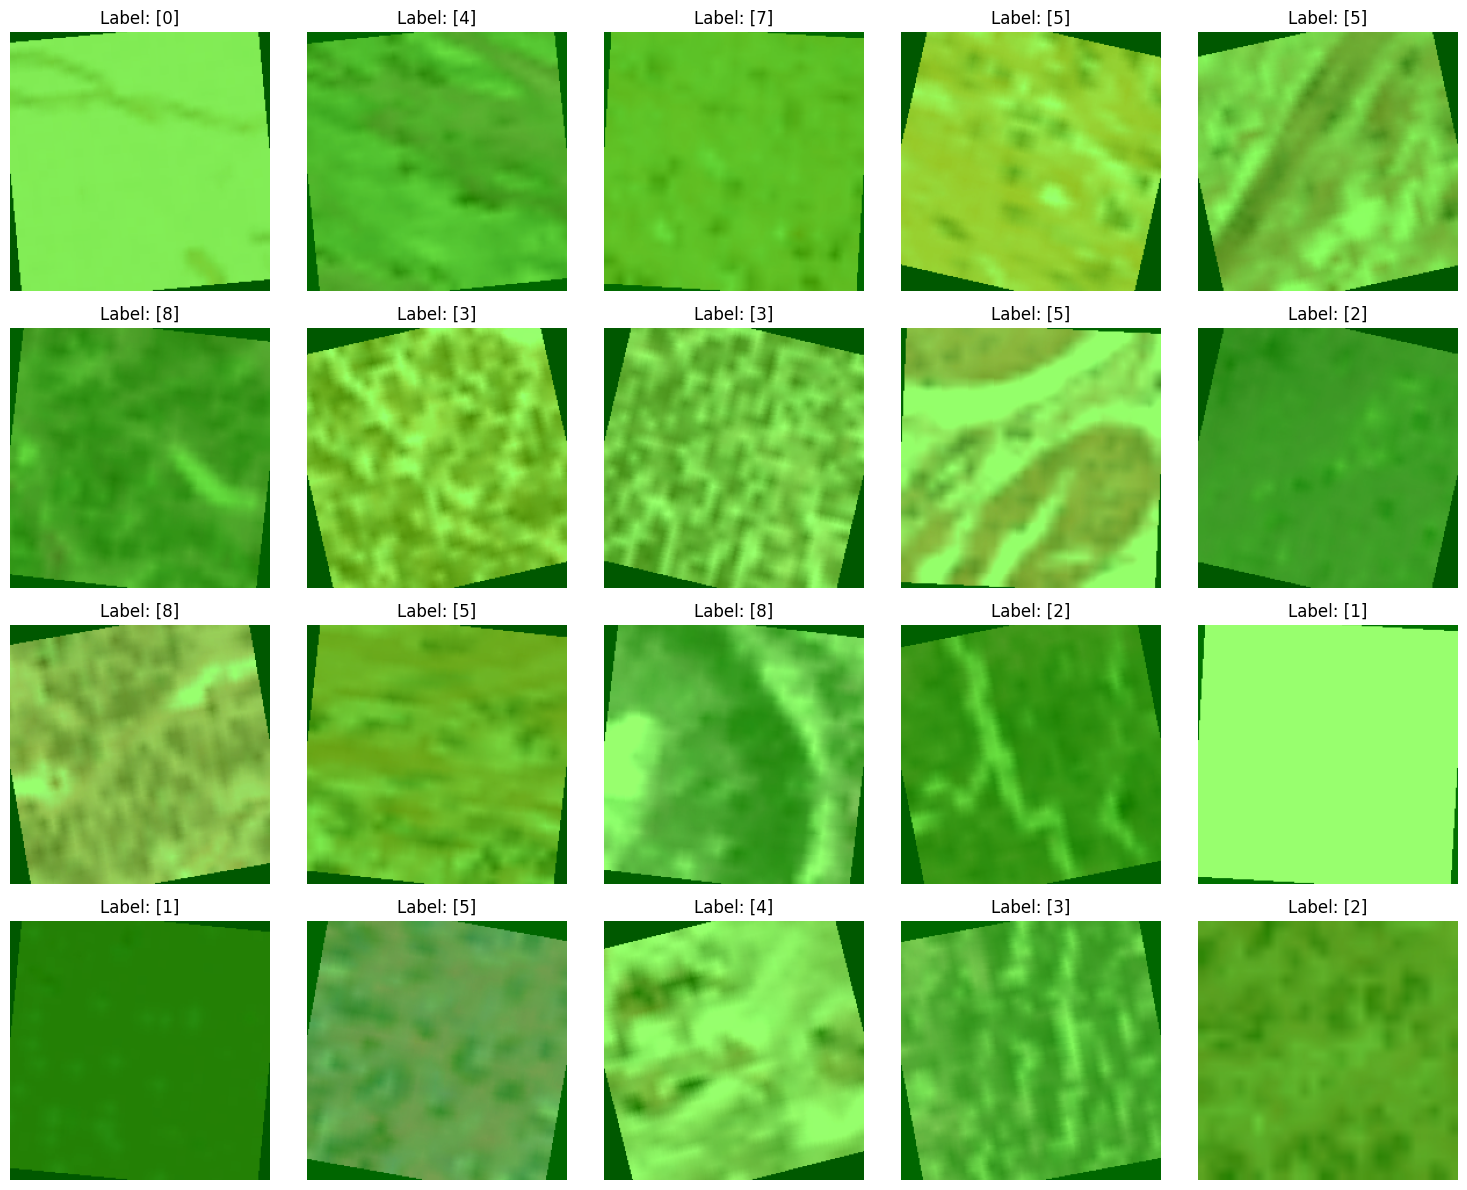

In [ ]:
import matplotlib.pyplot as plt

# Define the montage function
def show_montage(dataset, length=20, cols=5):
    """
    Displays a montage of images with their ground truths from the dataset.

    Args:
        dataset: The dataset object containing images and labels.
        length: The number of images to display.
        cols: Number of columns in the montage grid.
    """
    rows = (length + cols - 1) // cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()  # Flatten to handle cases where rows * cols > length

    for i in range(length):
        img, label = dataset[i]  # Get image and ground truth
        if hasattr(img, 'numpy'):  # Convert tensor to numpy if needed
            img = img.numpy().transpose(1, 2, 0)  # Convert to HWC
            img = (img * 0.5 + 0.5).clip(0, 1)  # Denormalize and clip

        # Plot image
        ax = axes[i]
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis('off')

    # Hide any extra subplots
    for ax in axes[length:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the montage function
show_montage(train_dataset, length=20, cols=5)


#**Params:**


*   **Number of epochs =** 5
*   **Learning Rate** = 0.001
*   **Batch Size** = 128
*   **Optimizer** = Adam


In [ ]:
model_redNet = ResNet18Model(in_channels=n_channels, num_classes=n_classes)

# Define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model_redNet.parameters(), lr=lr)


# Example: Print the model architecture
print(model_redNet)

from tqdm import tqdm
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to device
model_redNet = model_redNet.to(device)

# Training Loop
for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0


    # Set the model to training mode
    model_redNet.train()
    running_loss = 0.0

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}", unit="batch"):
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the GPU/CPU
        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model_redNet(inputs)

        # Compute loss
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Predicted class index
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    # Calculate and log training metrics
    train_accuracy = 100 * train_correct / train_total
    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_loader):.4f}, Accuracy = {train_accuracy:.2f}%")

    # Optional: Validation/Evaluation Loop
    model_redNet.eval()  # Set model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model_redNet(inputs)

            if task != 'multi-label, binary-class':
                targets = targets.squeeze().long()

            test_correct += calculate_accuracy(outputs, targets) * targets.size(0)
            test_total += targets.size(0)

    validation_accuracy = 100 * test_correct / test_total
    print(f"Validation Accuracy: {validation_accuracy:.2f}%")


ResNet18Model(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

Epoch 1/5: 100%|██████████| 704/704 [15:01<00:00,  1.28s/batch]


Epoch 1: Loss = 0.8976, Accuracy = 66.78%
Validation Accuracy: 77.55%


Epoch 2/5: 100%|██████████| 704/704 [14:35<00:00,  1.24s/batch]


Epoch 2: Loss = 0.4140, Accuracy = 85.07%
Validation Accuracy: 82.23%


Epoch 3/5: 100%|██████████| 704/704 [14:37<00:00,  1.25s/batch]


Epoch 3: Loss = 0.2898, Accuracy = 89.83%
Validation Accuracy: 71.85%


Epoch 4/5: 100%|██████████| 704/704 [14:33<00:00,  1.24s/batch]


Epoch 4: Loss = 0.2340, Accuracy = 91.90%
Validation Accuracy: 85.95%


Epoch 5/5: 100%|██████████| 704/704 [14:32<00:00,  1.24s/batch]


Epoch 5: Loss = 0.2063, Accuracy = 92.92%
Validation Accuracy: 84.82%


The result for this params is **92.92%** Accuracy for train and about validation accuracy is up to **85%** .

